# Etivity 1: Exploratory Data Analysis (EDA)
Name: Carla Warde

ID: 17204542

## Import Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('./bank.csv')

## Initial Exploration of Data
Before analysing the dataset in detail, let's have an overview of the data and its attributes.

In [3]:
# Print first 5 rows
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Print last 5 rows
dataset.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


By looking at the head and tail of data, we learn that there are 2000 entries in this dataset, and that there are both categorical (C) and numerical (N) attributes:

<ul>
    <li> Age (N)</li>
    <li> Job (C)</li>
    <li> Martial (C)</li>
    <li> Education (C)</li>
    <li> Default (C)</li>
    <li> Balance (N)</li>
    <li> Housing (C)</li>
    <li> Loan (C)</li>
    <li> Contact (C)</li>
    <li> Day (N)</li>
    <li> Month (C)</li>
    <li> Duration (N)</li>
    <li> Campaign (N)</li>
    <li> PDays (N)</li>
    <li> Previous (N)</li>
    <li> POutcome (C)</li>
    <li> Subscribed (C)</li>
</ul>

Let's start by verifying the consistency of the data:

In [5]:
dataset.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

As seen in the above table, there are values misssing for the `age`, `job`, `education`, `contact` and `poutcome` attributes.

## An Analysis of Numerical Data

In [6]:
# Print a summary for numerical attributes
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


From this summary of data we can observe the following:
<ol>
    <li>The <b>balance</b> attribute has a massive range of 82184 (81204 - -980)</li>
    <li>This huge range has skewed the <b>balance</b> attribute's mean as seen in the 862 difference between it and Q2 (i.e. 50% or the median)</li>
    <li>The minimum value of <b>pdays</b> is -1 which contextually does not make any sense</li>
</ol>

For further information on numerical attributes we can obtain a heat map of the attributes correlation:

<AxesSubplot:>

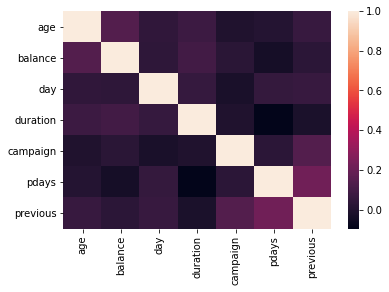

In [7]:
# correlation matrix between numerical attributes
sns.heatmap(dataset.corr())

This heat map reveals a slight correlation between the `balance` and `age` attributes, and also `pdays` and `previous`. In the context of the dataset, it suggests that either younger or older people have more money. Other correlations are negligible.

A pairplot can be used to examine these correlations in a more detailed manner.

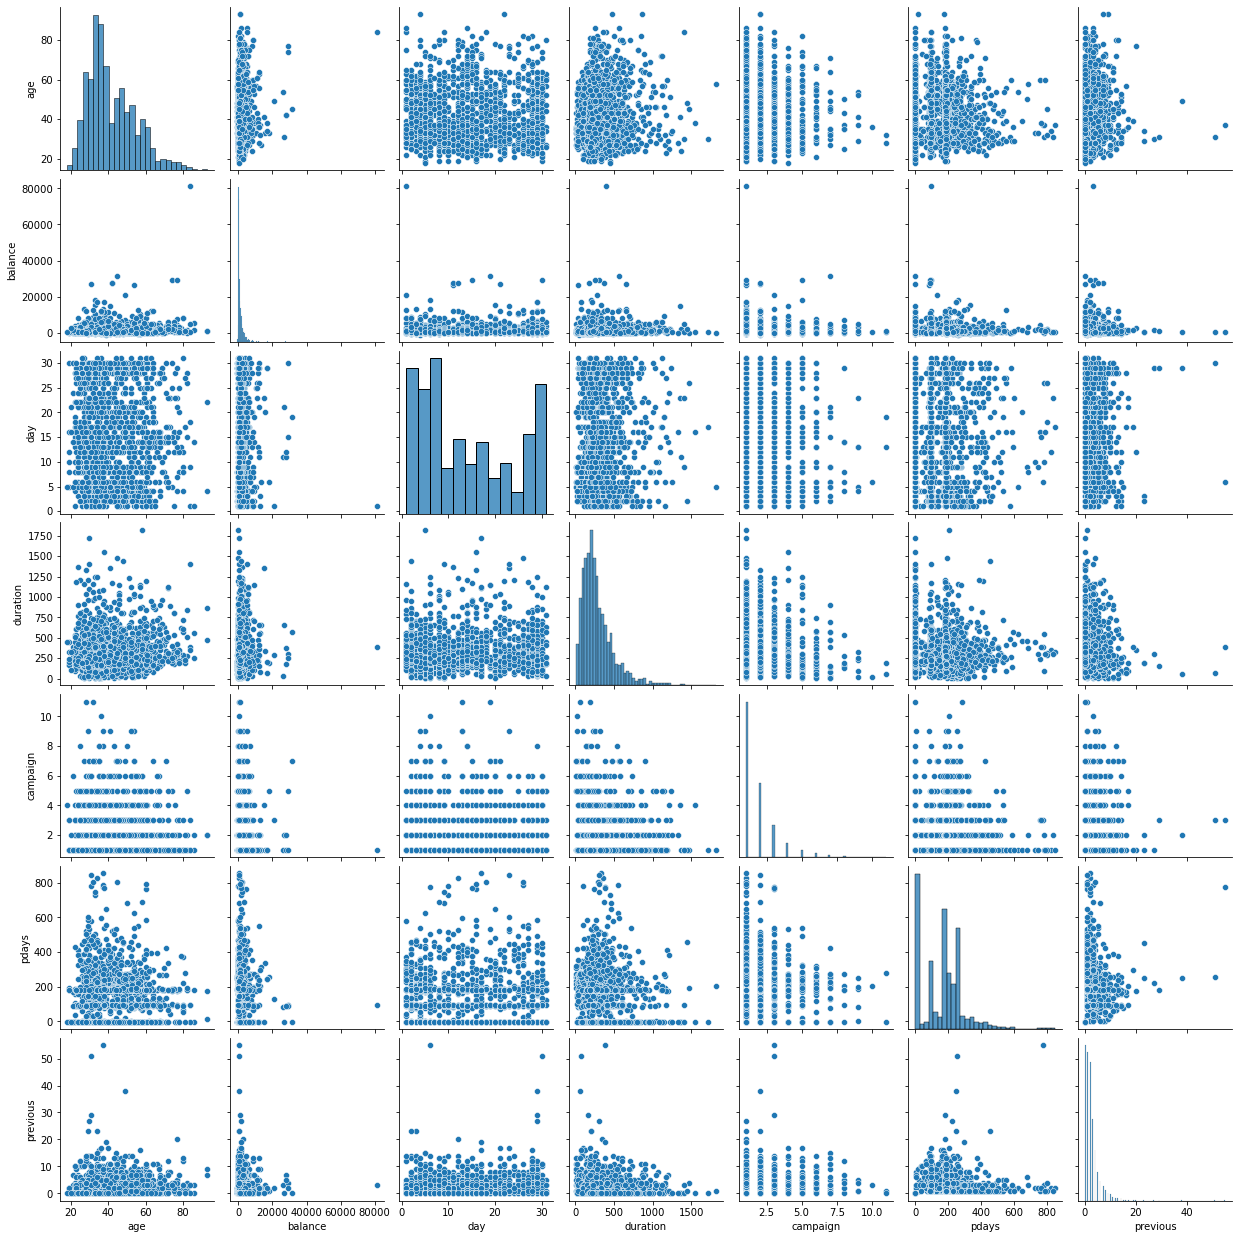

In [8]:
sns.pairplot(data=dataset[['age','balance','day','duration','campaign','pdays','previous']].dropna())
plt.show()

Following up on the correlation between `age` and `balance`, the pairplot reveals that in general, younger people generally have a slightly higher balance than older people. However, there is an extreme outlier that may skew the correlation in the other direction.

## An Analysis of Categorical Data
From our initial anaylsis, we know that `job`, `education`, `contact` and `poutcome` all have missing values. In the case of `poutcome`, 454 values are missing which is nearly a quarter of the dataset. Thus it will be hard to draw an cohesive conclusions about this attribute since so much data is missing.

In [9]:
dataset.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

From the remaining attributes that are not missing values, let's get a breakdown of their category frequency:

In [10]:
dataset['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [11]:
dataset['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

In [12]:
dataset['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [13]:
dataset['month'].value_counts()

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64

In [14]:
dataset['campaign'].value_counts()

1     1063
2      506
3      219
4       99
5       50
6       31
7       17
8        6
9        5
11       3
10       1
Name: campaign, dtype: int64

In [15]:
dataset['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

The following can be observed:
<ol>
    <li>Married people outnumber both divorced and single people put together. (1111 - (674+215))</li>
    <li>While the majority people do not have a house or personal loan, more have a house loan than a personal loan.</li>
    <li>Most calls take place between Jan-Aug.</li>
</ol>

## Question
After the initial analysis of the data, I am intruiged by the the skew in the data towards younger people. My aim is to find out whether the dominant method of contact could have caused this skew, and subsequently is there a correlation between `age`, `contact` and `subscribed`.

First it is necessary to clean up the data by removing data entries with a missing `contact` or `age` value as otherwise these entries will mess up the results. Removing these entries reduces the dataframe from 2000 entries to 1797.

In [16]:
dataset.dropna(subset=['contact'], inplace=True)
dataset.dropna(subset=['age'], inplace=True)
print(len(dataset.index))

1797


### Overviw of relevant attributes
Now that `contact` is not missing any values, we can get a better idea of the category frequency where we quickly learn that the vast majority of people are contacted via 'cellular'.

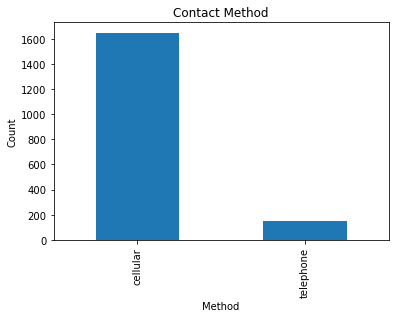

In [17]:
frequency_table = dataset['contact'].value_counts()
frequency_table.plot(kind='bar')
plt.xlabel('Method')
plt.ylabel('Count')
plt.title('Contact Method')
plt.show()

We can also have a look at how `age` is broken down via a histogram and can see the vast majority of people in the dataframe are between the ages of approx 25-40, and that there are a few outliers:

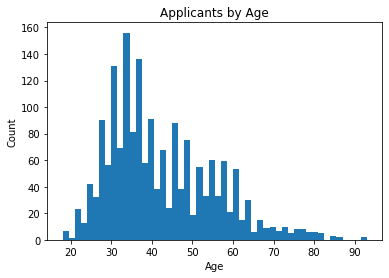

In [18]:
plt.hist(dataset['age'], bins = 50)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title('Applicants by Age')
plt.show()

Another way of looking at this data is by using a boxplot, which also supports the existance of outliers:

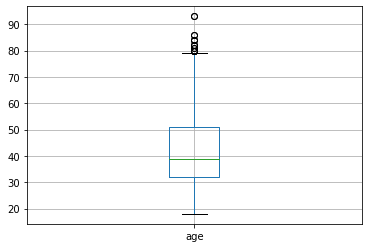

In [19]:
dataset.boxplot(column='age')
plt.show()

And finally, by obtaining a frequency table of the `subscribed` attribute, we learn that there's an almost even breakdown between those who are subscribed and those who aren't.

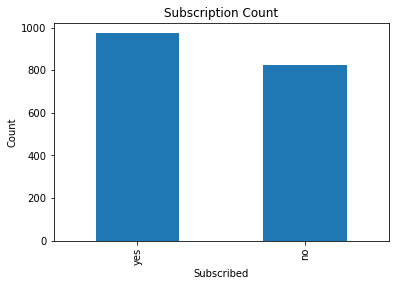

In [20]:
frequency_table = dataset['subscribed'].value_counts()
frequency_table.plot(kind='bar')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.title('Subscription Count')
plt.show()

### Intial thoughts on these attributes
The dominant method of contact is cellular or, in other words, a mobile phone. This, in my opinion, is the most probable reason for the skew in age towards younger people, since elderly people are less likely to have mobile phones. I'll investiage this connection further and it's correlation with the subscription rate in the next section.

### Analysing the relationship between, age, contact and subscribed

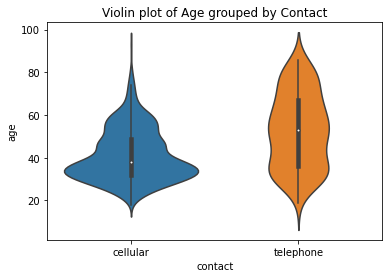

In [21]:
sns.violinplot(data=dataset, x='contact', y='age')
plt.title('Violin plot of Age grouped by Contact')
plt.show()

The above violin plot confirms my earlier hypothesis. Indeed, it is younger people who were mostly contacted via cellular, and older people were mostly reached via telephone. Due the very low amount of people contacted via telephone it is no surprise that the sample consists of mostly younger people.

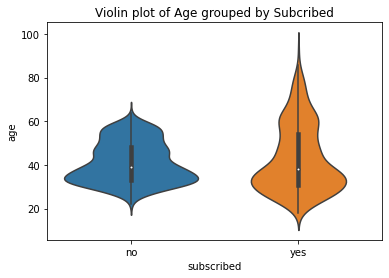

In [22]:
sns.violinplot(data=dataset, x='subscribed', y='age')
plt.title('Violin plot of Age grouped by Subcribed')
plt.show()

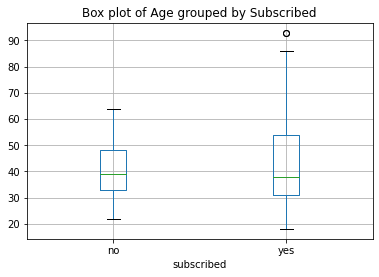

In [23]:
dataset.boxplot(column='age', by='subscribed')
plt.title('Box plot of Age grouped by Subscribed')
plt.suptitle("")
plt.show()

The violin plot and box plot above shows a strong correlation between age and subscription. People above the age of approx 65 seem to all be subscribed, whereas younger people are almost equally likely to be subscribed or not subcribed.

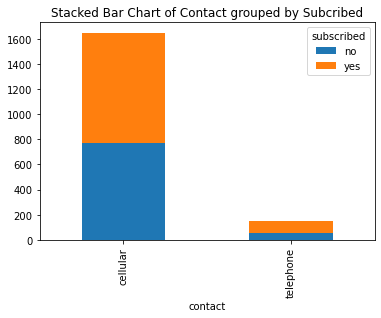

In [24]:
df2 = dataset.groupby(['contact', 'subscribed']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contact grouped by Subcribed')
plt.show()

The stacked bar chart reveals that people contacted via cellular have a roughly even split of being subscribed or not. However, the telephone bar reveals more people are subscribed than not.

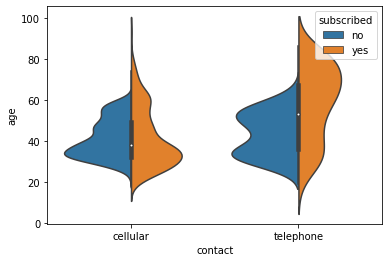

In [25]:
sns.violinplot(data=dataset, x='contact', y='age', hue='subscribed', split=True)
plt.show()

This final graph is a violin plot which shows the relationship between `age`, `contact` and `subcribed`. The following conclusions can be proposed from this and the previous graphs:
<ol>
    <li>The predominant use of cellular contact has caused a huge skew in the data towards younger people since younger people are the most likely to use mobile phones.</li>
    <li>Most older people are subscribed, whereas younger people are 50/50.</li>
    <li>People contacted via cellular have an approx. 50% subscription rate. In contrast, people contacted through telephone are mostly subcribed rather than not. However, since older people are more likely to be subscribed in general and are predominantly contacted via telephone, this does not indicate telephone as the more effective contact method.</li>
</ol>